### Plotting of relative expectation value
We use the following expression for the ratio of expectation values: 

$\frac{_L \langle 0|\hat{n}^p| 0 \rangle _L}{ _L \langle 1| \
\hat{n}^p| 1 \rangle _L} = \frac{\mathcal{N}_-(\langle\hat{n}^p \rangle + S_{n^p \pm})}{\mathcal{N}_+(\langle\hat{n}^p\rangle - S_{n^p \
\pm})}$,

where 

$\mathcal{N}_{\pm} = 2(1 \pm \text{cosh}^{-1/2}(2r))$,

$S_{n^p \pm} = \langle 0 | S^\dagger (\pm \xi) \hat{n}^p S(\mp \xi) | \
0 \rangle =  \frac{1}{\text{cosh}r}\sum_{n=0}^{\infty}(-1)^n \
\frac{(2n)!}{(2^n n!)^2} (2n)^p \text{ tanh}^{2n} r$,

$\langle \hat{n}^p \rangle =  \langle 0 | S^\dagger (\pm \xi) \
\hat{n}^p S(\pm \xi) | 0 \rangle  = \frac{1}{\text{cosh}r}\sum_{n=0}^{\infty} \frac{(2n)!}{(2^n n!)^2} (2n)^p \text{ \
tanh}^{2n} r$.

There is a factor $2\text{cosh}^{-1}r$ that cancels from the ratio. The remaining sums are evaluated in Mathematica for $p\in\{1, 2, 3, 4\}$ (see separate file). Here we plot the result as a function of squeezing strength.


In [1]:
using HypergeometricFunctions

In [2]:
using PyPlot

In [3]:
function ratio_p_eq_1(r)
    prefactor = (1-cosh(2*r)^(-1/2))/(1+ cosh(2*r)^(-1/2))
    expect_n = tanh(r)^2/(sech(r)^2)^(3/2)
    S_n_pm = -(tanh(r)^2/(1 + tanh(r)^2)^(3/2))
    
    return prefactor*(expect_n + S_n_pm)/(expect_n -S_n_pm)
end

ratio_p_eq_1 (generic function with 1 method)

In [4]:
function ratio_p_eq_2(r)
    prefactor = (1-cosh(2*r)^(-1/2))/(1+ cosh(2*r)^(-1/2))
    expect_n2 = (sinh(r)^2*(2 + tanh(r)^2))/(sech(r)^2)^(3/2)
    S_n2_pm = (tanh(r)^2*(-2 + tanh(r)^2))/(1 + tanh(r)^2)^(5/2)
    
    return prefactor*(expect_n2 + S_n2_pm)/(expect_n2 -S_n2_pm)
end

ratio_p_eq_2 (generic function with 1 method)

In [5]:
function ratio_p_eq_3(r)
    prefactor = (1-cosh(2*r)^(-1/2))/(1+ cosh(2*r)^(-1/2))
    expect_n3 = (cosh(r)^4*sinh(r)^2*(4 + 10*tanh(r)^2 + tanh(r)^4))/sqrt(sech(r)^2)
    S_n3_pm = -((tanh(r)^2*(4 - 10*tanh(r)^2 + tanh(r)^4))/(1 + tanh(r)^2)^(7/2))
    
    return prefactor*(expect_n3 + S_n3_pm)/(expect_n3 -S_n3_pm)
end

ratio_p_eq_3 (generic function with 1 method)

In [6]:
function ratio_p_eq_4(r)
    prefactor = (1-cosh(2*r)^(-1/2))/(1+ cosh(2*r)^(-1/2))
    expect_n4 = 8*pFq((3/2, 2, 2, 2), (1, 1, 1), tanh(r)^2)*tanh(r)^2
    S_n4_pm = -8*pFq((3/2, 2, 2, 2), (1, 1, 1), -tanh(r)^2)*tanh(r)^2
    
    return prefactor*(expect_n4 + S_n4_pm)/(expect_n4 -S_n4_pm)
end

ratio_p_eq_4 (generic function with 1 method)

In [7]:
r = range(0, 4, 41);

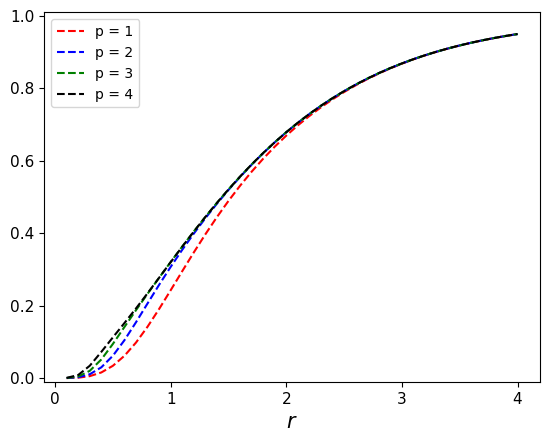

PyObject <matplotlib.legend.Legend object at 0x16cbc0220>

In [8]:
plot(r, ratio_p_eq_1.(r), linestyle = "dashed", color = "red", label = "p = 1")
plot(r, ratio_p_eq_2.(r), linestyle = "dashed", color = "blue", label = "p = 2")
plot(r, ratio_p_eq_3.(r), linestyle = "dashed", color = "green", label = "p = 3")
plot(r, ratio_p_eq_4.(r), linestyle = "dashed", color = "black", label = "p = 4")
plot(grid=false, framestyle=:box)
xlabel(L"r", fontsize=15)
xticks(ticks=[0, 1,  2, 3, 4], fontsize=11)
yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=11)
ylim(-0.01, 1.01)
legend(loc="best")